<a href="https://colab.research.google.com/github/kacper-dobrow/tensorflow-course/blob/main/01_neural_net_regression_in_tf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro to regression with neural nets in TF

In short predicting a value with input data

In [1]:
# Import TF
import tensorflow as tf
tf.__version__

'2.13.0'

## Creating data to view and fit

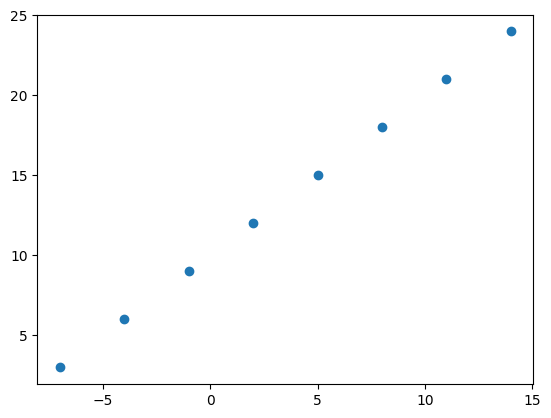

In [2]:
import numpy as np
import matplotlib.pyplot as plt

#create features (input)
X = np.array([-7.,-4.,-1.,2.,5.,8.,11.,14.])

#create labels (output)
y = np.array([3.,6.,9.,12.,15.,18.,21.,24.])

#visualize data with matplotlib
plt.scatter(X,y)

In [3]:
y == X+10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shapes

In [5]:
# create a demo tensor for our housing price prediction problem
house_info = tf.constant(['bedroom','bathroom','garage'])
house_price = tf.constant([939700.]) #in for of a list - remember
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=float32, numpy=array([939700.], dtype=float32)>)

In [6]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [18]:
# turn our np arrays into tensors
X = tf.cast(tf.constant(X),dtype=tf.float32)
y = tf.cast(tf.constant(y),dtype = tf.float32)
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [9]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

## Steps in modelling in Tensorflow

1. Create a model - define input, output and hidden layers
2. Compile the model - define the loss fcn that tells you how far away from 'real values' you are, and the optimizer and evaluation metrics
3. Fit the model - letting the model find patterns between inputs and outputs (features and labels)

Reminder for the steps in modelling with tf
1. Get data ready
2. Build or pick a pretrained model
3. Fit the model to the data and make a prediction
4. Evaluate the model
5. Improve through experimentation
6. Save and reload the trained model

> Blok z wcięciem



In [25]:
# Set random seed for reproducibility
tf.random.set_seed(42)

# 1. Create a model using the sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.MAE, #MAE is short for mean absolute error
              optimizer = tf.keras.optimizers.SGD(), #SGD is short for stochastic gradient descent
              metrics = ['mae']) #means that we use the tf.keras.losses.MAE   'mae' is sort of an alias

# 3. Fit the model
model.fit(tf.expand_dims(X,axis=-1),y,epochs=5) # fit inputs X to outputs y and you have 5 opportunities to do it right
#tf.expand_dims(X,axis=-1) istead of just X, because model.fit needs a higher dimensional input tensor


Epoch 1/5
1/1 [==============================] - 0s 348ms/step - loss: 8.6847 - mae: 8.6847
Epoch 2/5
1/1 [==============================] - 0s 10ms/step - loss: 8.5522 - mae: 8.5522
Epoch 3/5
1/1 [==============================] - 0s 10ms/step - loss: 8.4197 - mae: 8.4197
Epoch 4/5
1/1 [==============================] - 0s 11ms/step - loss: 8.2872 - mae: 8.2872
Epoch 5/5
1/1 [==============================] - 0s 11ms/step - loss: 8.1547 - mae: 8.1547


In [27]:
# Try to make a prediction using our model
y_pred = model.predict([17.])
y_pred

1/1 [==============================] - 0s 70ms/step


array([[26.413698]], dtype=float32)

## Improving the model

We improve the model by altering the steps we took in order to create the model
1. Creating the model - add more layers, add more hidden neurons, change the activation fcn
2. Compiling the model - change the optimizer, **learning rate**
3. Fitting the model - fit it for more epochs or more data

In [29]:
# let's rebuild our model

#1. create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = 'mae')

# 3. Fit the model
model.fit(tf.expand_dims(X,axis=-1),y,epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 353ms/step - loss: 11.1924 - mae: 11.1924
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 11.0599 - mae: 11.0599
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 10.9274 - mae: 10.9274
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 10.7949 - mae: 10.7949
Epoch 5/100
1/1 [==============================] - 0s 8ms/step - loss: 10.6624 - mae: 10.6624
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 10.5299 - mae: 10.5299
Epoch 7/100
1/1 [==============================] - 0s 8ms/step - loss: 10.3974 - mae: 10.3974
Epoch 8/100
1/1 [==============================] - 0s 11ms/step - loss: 10.2649 - mae: 10.2649
Epoch 9/100
1/1 [==============================] - 0s 12ms/step - loss: 10.1324 - mae: 10.1324
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 9.9999 - mae: 9.9999
Epoch 11/100
1/1 [==============================] - 0s

In [30]:
# Remind ourselves of the data
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [31]:
#Model prediction
model.predict([17.])

1/1 [==============================] - 0s 98ms/step


array([[29.88344]], dtype=float32)

In [59]:
#once again try to improve the net

# 1. create the model
#add an extra layer
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None), #only adding one hidden layer
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(optimizer = tf.keras.optimizers.Adam(lr = 0.01), #learning rate is probably the most important hyperparameter OF THEM ALL
              loss = 'mae', #keyword instead of explicit function
              metrics = ['mae'])

# 3. fit the model to the data
model.fit(tf.expand_dims(X,axis = -1),y,epochs = 100)

Epoch 1/100
1/1 [==============================] - 1s 554ms/step - loss: 12.4721 - mae: 12.4721
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 12.4079 - mae: 12.4079
Epoch 3/100
1/1 [==============================] - 0s 13ms/step - loss: 12.3437 - mae: 12.3437
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 12.2795 - mae: 12.2795
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 12.2152 - mae: 12.2152
Epoch 6/100
1/1 [==============================] - 0s 12ms/step - loss: 12.1510 - mae: 12.1510
Epoch 7/100
1/1 [==============================] - 0s 13ms/step - loss: 12.0867 - mae: 12.0867
Epoch 8/100
1/1 [==============================] - 0s 12ms/step - loss: 12.0224 - mae: 12.0224
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 11.9580 - mae: 11.9580
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 11.8936 - mae: 11.8936
Epoch 11/100
1/1 [==============================]

In [58]:
model.predict([17.])

1/1 [==============================] - 0s 67ms/step


array([[26.98303]], dtype=float32)

To sum up - methods to improve the net:
* add layers
* increase no of hidden neurons
* change activation fcns
* change optimizers
* change the **learning rate**
* fit on more data
* fit for longer - more epochs

## Evaluating a model

In practice a typical workflow is:
1. Build a model
2. fit the model
3. Evaluate the model
4. Tweak the model
5. Repeat steps 2-4 until meets criteria

When evaluating **visualize**
* data
* the model
* training parameters
* predictions of the model

In [64]:
# make a bigger dataset
X = tf.range(-100.,100.,4.,dtype = tf.float32)
y= X+10.
X = tf.expand_dims(X,axis=-1)

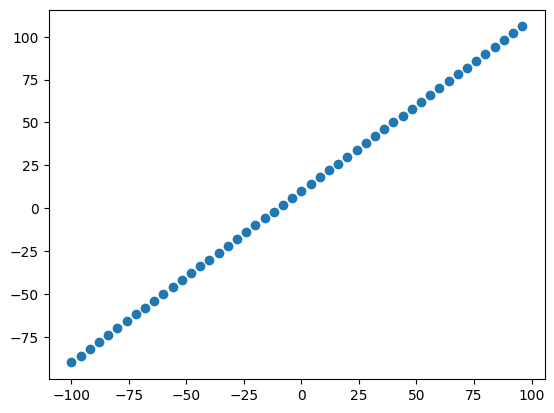

In [67]:
plt.scatter(X,y) #dots if I wanted to have a line I would pass plt.plot(X,y)

### 3 sets - training, validating, test set

* training set - typically 70-80% - the model learns from this data
* validation set - the model gets tuned on this data, typ 10-15%
* test set - the model gets evaluated upon the performance on this data, typ 10-15%

for now we'll split it only to two sets - training and test

In [68]:
# check the length of how many samples we have
len(X)

50

In [69]:
# split the data into train and test sets
X_train = X[:40] # first 80% of data
X_test = X[40:]

y_train = y[:40]
y_test = y[40:]